$\textbf{Time Serial Cython Version}$

$\textbf{Files Used}$ 

+ ```root/serial_numba/lebwohl_lasher_s_cython.pyx```
+ ```root/serial_numba/run_lebwohl_lasher_s_cython.py```
+ ```root/serial_numba/setup_lebwohl_lasher_s_cython.py```

$\textbf{Commit Version}$

+ ```lebwohl_lasher_s_cython.pyx - 4ac061c06f7749ef8438fb809b080b743c4094af```
+ ```run_lebwohl_lasher_s_cython.py - c8be37f204a23e5482934ec4a729b0c58c9c9e5d```
+ ```setup_lebwohl_lasher_s_cython.py - a483c7babd1bed483506d98443018aff8e5543b6```

In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Import the script.
import lebwohl_lasher_s_cython

$\textbf{1. BC4 Runtimes}$

+ $\text{Lattice Sizes: 25 - 1000}$

- $\text{Monte Carlo Steps: 50}$
- $\text{Reduced Temperature: 0.5}$


+ ```python ../statistics.py bc4_runtimes serial_cython runtimes.csv```

In [2]:
# Read the runtimes into a DataFrame.
runtimes = pd.read_csv("runtimes.csv")

# Print the DataFrame.
print(runtimes.to_markdown())

|    |   Lattice-Size |   Runtime-Average |   Runtime-STD |
|---:|---------------:|------------------:|--------------:|
|  0 |             25 |         0.0206927 |   0.00034116  |
|  1 |             50 |         0.0694898 |   0.000618342 |
|  2 |             75 |         0.154204  |   0.000900193 |
|  3 |            100 |         0.259142  |   0.00565899  |
|  4 |            200 |         1.00172   |   0.00211342  |
|  5 |            300 |         2.33649   |   0.00262238  |
|  6 |            400 |         4.09989   |   0.0327307   |
|  7 |            500 |         6.30884   |   0.0163757   |
|  8 |            600 |         9.47075   |   0.121185    |
|  9 |            700 |        12.0695    |   0.0134608   |
| 10 |            800 |        15.8101    |   0.258808    |
| 11 |            900 |        19.5439    |   0.028675    |
| 12 |           1000 |        24.2487    |   0.0784558   |


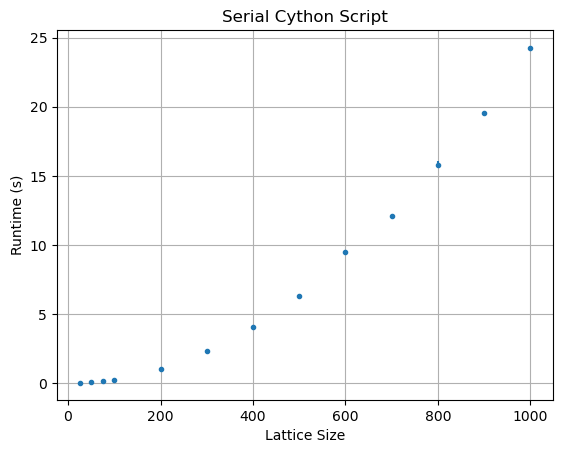

In [3]:
##  Plot the runtimes.

fig, ax = plt.subplots()

ax.errorbar(runtimes["Lattice-Size"], runtimes["Runtime-Average"], runtimes["Runtime-STD"], fmt=".")
ax.grid()

ax.set_title("Serial Cython Script")
ax.set_xlabel("Lattice Size")
ax.set_ylabel("Runtime (s)")

plt.show()

$\textbf{2. Time Specific Functions}$

In [4]:
# Generate a lattice.
lattice_length = 100
lattice = np.random.random_sample((lattice_length, lattice_length)) * 2.0 * np.pi

# Define the temperature.
temperature = 0.5

$\textbf{2.1 Timed Function:}$ ```cell_energy```

In [5]:
# Set the number of runs.
num_runs = 1000

# Create an array to store the results.
results = np.zeros(num_runs)

# Time the "cell_energy" function.
for i in range(num_runs):
    # Generate two random positions.
    x_pos, y_pos = np.random.randint(0, high=lattice_length, size=2)

    # Start the timer.
    start = time.perf_counter()

    # Call the function.
    lebwohl_lasher_s_cython.cell_energy(lattice, lattice_length, x_pos, y_pos)

    # End the timer.
    # Save the runtime.
    end = time.perf_counter()
    results[i] = end - start
    
# Print the average runtime.
# Print the standard deviation.
print(f"Runtime Average : {results.mean()}")
print(f"Runtime STD     : {results.std()}")

Runtime Average : 1.915916987854871e-06
Runtime STD     : 3.131512203808506e-06


$\textbf{2.2 Timed Function:}$ ```total_energy```

In [6]:
# Set the number of runs.
num_runs = 1000

# Create an array to store the results.
results = np.zeros(num_runs)

# Time the "total_energy" function.
for i in range(num_runs):
    # Start the timer.
    start = time.perf_counter()

    # Call the function.
    lebwohl_lasher_s_cython.total_energy(lattice, lattice_length)

    # End the timer.
    # Save the runtime.
    end = time.perf_counter()
    results[i] = end - start
    
# Print the average runtime.
# Print the standard deviation.
print(f"Runtime Average : {results.mean()}")
print(f"Runtime STD     : {results.std()}")

Runtime Average : 0.0008198578059982537
Runtime STD     : 0.00016368200516991035


$\textbf{2.3 Timed Function:}$ ```calculate_order```

In [7]:
# Set the number of runs.
num_runs = 1000

# Create an array to store the results.
results = np.zeros(num_runs)

# Time the "calculate_order" function.
for i in range(num_runs):
    # Start the timer.
    start = time.perf_counter()

    # Call the function.
    lebwohl_lasher_s_cython.calculate_order(lattice, lattice_length)

    # End the timer.
    # Save the runtime.
    end = time.perf_counter()
    results[i] = end - start
    
# Print the average runtime.
# Print the standard deviation.
print(f"Runtime Average : {results.mean()}")
print(f"Runtime STD     : {results.std()}")

Runtime Average : 0.00028671678403225086
Runtime STD     : 0.00010355555799428344


$\textbf{2.4 Timed Function:}$ ```monte_carlo_step```

In [8]:
# Set the number of runs.
num_runs = 1000

# Create an array to store the results.
results = np.zeros(num_runs)

# Time the "monte_carlo_step" function.
for i in range(num_runs):
    # Start the timer.
    start = time.perf_counter()

    # Call the function.
    lebwohl_lasher_s_cython.monte_carlo_step(lattice, lattice_length, temperature)

    # End the timer.
    # Save the runtime.
    end = time.perf_counter()
    results[i] = end - start
    
# Print the average runtime.
# Print the standard deviation.
print(f"Runtime Average : {results.mean()}")
print(f"Runtime STD     : {results.std()}")

Runtime Average : 0.002200204043989288
Runtime STD     : 0.0004339828673567986
